In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('FinalLoanData.csv')
df

,Unnamed: 0,Meets Credit Policy?,Interest Rate (%),Log Annual Income ($),FICO Score,Revolving Balance ($),Revolving Line Utilisation Rate,No. of Overdue Payments,No. of Derogatory Public Records,Loan Not Fully Paid
0,0,1,11.89,11.35,737,28854,52.1,0,0,0
1,1,1,10.71,11.08,707,33623,76.7,0,0,0
2,2,1,13.57,10.37,682,3511,25.6,0,0,0
3,3,1,10.08,11.35,712,33667,73.2,0,0,0
4,4,1,14.26,11.30,667,4740,39.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...
9573,9573,0,14.61,12.18,672,215372,82.1,0,0,1
9574,9574,0,12.53,11.14,722,184,1.1,0,0,1
9575,9575,0,10.71,10.60,687,10036,82.9,0,0,1
9576,9576,0,16.00,10.82,692,0,3.2,0,0,1


In [3]:
df.columns = ['Delete', 'Meets Credit Policy?', 'Interest Rate (%)', 'Log Annual Income ($)', 'FICO Score', 'Revolving Balance ($)', 'Revolving Line Utilisation Rate', 'No. of Overdue Payments', 'No. of Derogatory Public Records', 'LoanNotFullyPaid']

In [4]:
del df['Delete']

In [5]:
df.LoanNotFullyPaid.value_counts() # More people who did pay back fully than did not

0    8045
1    1533
Name: LoanNotFullyPaid, dtype: int64

In [6]:
data = df[['Interest Rate (%)', 'Log Annual Income ($)', 'FICO Score', 'Revolving Balance ($)', 'Revolving Line Utilisation Rate', 'No. of Overdue Payments', 'No. of Derogatory Public Records']]
target = df[['LoanNotFullyPaid']]  

In [7]:
data = data.to_numpy()
target = target.to_numpy() # Convert to NumPy arrays so suitable as input for algorithms

In [8]:
X = data # predictors
y = target # outcomes
y.shape = (9578,) 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [10]:
from sklearn.tree import DecisionTreeClassifier
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y) # Split into training and testing sets
model = DecisionTreeClassifier(max_depth = 10) # Create model
model.fit(Xtrain, ytrain) # Train model to find training outcomes as function of training variable states
ypred = model.predict(Xtest) # Based on testing data predictors, make predictions of outcomes using model
print("{0} / {1} correct".format(np.sum(ytest == ypred), len(ytest))) 

1958 / 2395 correct


In [11]:
metrics.accuracy_score(ytest, ypred)

0.8175365344467641

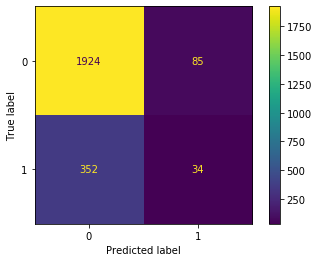

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
matrix = confusion_matrix(ytest, ypred, labels=model.classes_) # To what extent do predictions reflect actual?
display = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=model.classes_)
display.plot()

In [13]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred, labels=model.classes_))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2009
           1       0.29      0.09      0.13       386

    accuracy                           0.82      2395
   macro avg       0.57      0.52      0.52      2395
weighted avg       0.76      0.82      0.77      2395



In [14]:
from sklearn.ensemble import RandomForestClassifier
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)
model = RandomForestClassifier(n_estimators=100, random_state=0) # Average of outputs of 100 decision trees
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print("{0} / {1} correct".format(np.sum(ytest == ypred), len(ytest)))

2023 / 2395 correct


In [15]:
metrics.accuracy_score(ytest, ypred)

0.8446764091858038

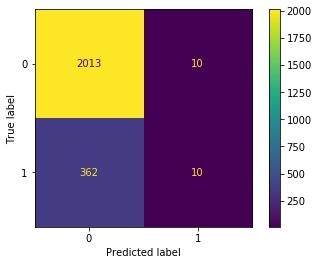

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
matrix = confusion_matrix(ytest, ypred, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=model.classes_)
display.plot()

In [17]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred, labels=model.classes_))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2023
           1       0.50      0.03      0.05       372

    accuracy                           0.84      2395
   macro avg       0.67      0.51      0.48      2395
weighted avg       0.79      0.84      0.78      2395



In [18]:
# Although both perform badly, decision tree actually performs better than random forest with many decision trees